## 模型正则化（限制参数的大小）
> **多引入一项，目的是让参数尽可能小**

> **a/2是一个超参数，含义是参数在优化中所占的比重**

<img src='./picture/8-1.png'>

## 模型正则化------- 岭回归 Ridge Regression
> **模型正则化有多种方式，岭回归是其中一种**

> **使用岭回归大大提高了模型的泛化能力**

<img src='./picture/8-2.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100) # -3 到 3之间随机取值 
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

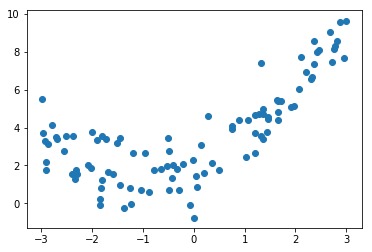

In [2]:
plt.scatter(x, y)
plt.show()

## 不使用岭回归，普通的多项式回归

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures# 导入类，使用方法与之前归一化相同

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
        ])

In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
poly_reg = PolynomialRegression(degree=40)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

43.70424774773722

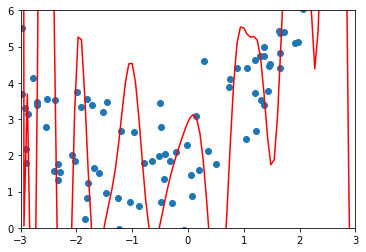

In [18]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

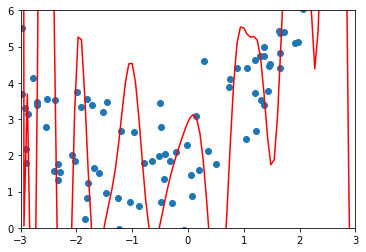

In [21]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

## 使用岭回归
> **使用岭回归，多加了一项，抑制目标函数的变化，解决欠拟合的问题**

> **超参数alpha 表示正则化的程度**

In [22]:
from sklearn.linear_model import Ridge #岭

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('rigde_reg', Ridge(alpha = alpha))
        ])

In [23]:
ridge1_reg = RidgeRegression(40 , 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.0982747990595678

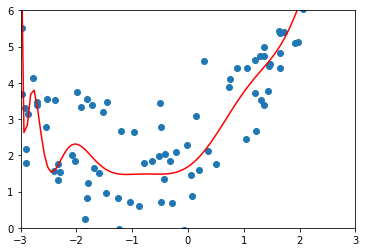

In [24]:
plot_model(ridge1_reg)

---
不同的超参数

In [25]:
ridge2_reg = RidgeRegression(40 , 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.0982747990595678

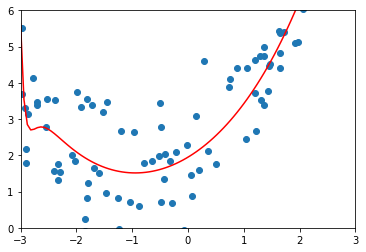

In [26]:
plot_model(ridge2_reg)

In [28]:
ridge3_reg = RidgeRegression(40 , 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.0982747990595678

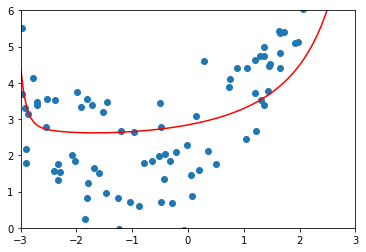

In [29]:
plot_model(ridge3_reg)